# NLP Assignment-1 

## Amazon mobile electronics product review 

### Imported data from Tensorflow data sets - amazon_us_reviews

### Description- Dataset consists single language review 'english' and from a single market place 'US'

### <span style="color:green">Importing data set and excluding bad rows</span>

In [8]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt




In [9]:
df = pd.read_csv('amazon_reviews_us_Mobile_Electronics_v1_00.tsv',sep='\t',error_bad_lines=False)
df_2 = pd.read_csv('amazon_reviews_us_Mobile_Electronics_v1_00.tsv',sep='\t',error_bad_lines=False) # Visualization df only used for visualizing insights from all columns

df.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 35246: expected 15 fields, saw 22\n'
b'Skipping line 87073: expected 15 fields, saw 22\n'
b'Skipping line 35246: expected 15 fields, saw 22\n'
b'Skipping line 87073: expected 15 fields, saw 22\n'


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,217304173,BlackVue DR600GW-PMP,Mobile_Electronics,5.0,0.0,0.0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",2015-08-31
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,137313254,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5.0,0.0,1.0,N,Y,five star,it's great,2015-08-31
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5.0,0.0,0.0,N,Y,great cables,These work great and fit my life proof case fo...,2015-08-31
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,221169481,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4.0,0.0,0.0,N,Y,Work very well but couldn't get used to not he...,Work very well but couldn't get used to not he...,2015-08-31
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2.0,0.0,0.0,N,Y,Cameras has battery issues,"Be careful with these products, I have bought ...",2015-08-31


### Understanding the data set

In [2]:
df.shape

(104852, 15)

In [3]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          2
helpful_votes        2
total_votes          2
vine                 2
verified_purchase    2
review_headline      4
review_body          3
review_date          2
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104852 entries, 0 to 104851
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   marketplace        104852 non-null  object 
 1   customer_id        104852 non-null  int64  
 2   review_id          104852 non-null  object 
 3   product_id         104852 non-null  object 
 4   product_parent     104852 non-null  int64  
 5   product_title      104852 non-null  object 
 6   product_category   104852 non-null  object 
 7   star_rating        104850 non-null  float64
 8   helpful_votes      104850 non-null  float64
 9   total_votes        104850 non-null  float64
 10  vine               104850 non-null  object 
 11  verified_purchase  104850 non-null  object 
 12  review_headline    104848 non-null  object 
 13  review_body        104849 non-null  object 
 14  review_date        104850 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1

# A) Data Wrangling

### Distribution of values in columns

<AxesSubplot:>

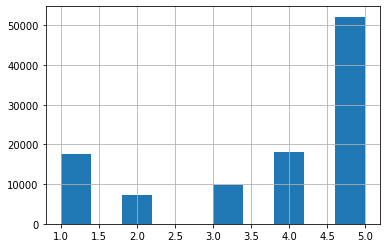

In [5]:
df['star_rating'].hist()

<AxesSubplot:>

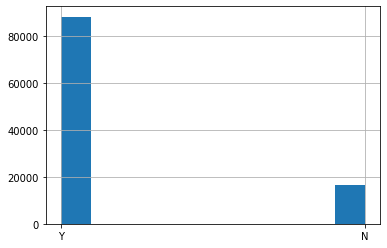

In [6]:
#if it is not a verified one, it can be biased. has to remove those review under some conditions
df['verified_purchase'].hist()

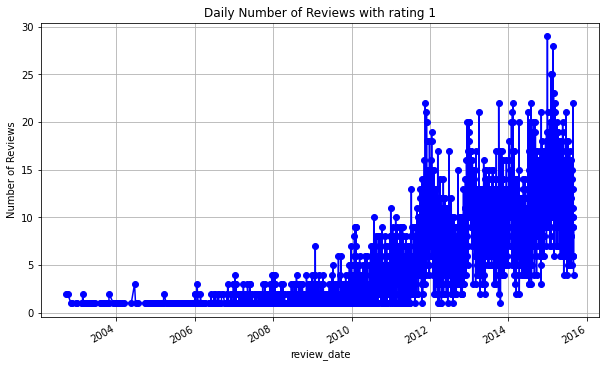

In [11]:
df['review_date'] = pd.to_datetime(df['review_date'])
df_1 = df[df['star_rating'] == 1]

# Group by date and count the number of reviews for each day
daily_count = df_1.groupby('review_date').size()

# Plot the daily count
plt.figure(figsize=(10, 6))
daily_count.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Daily Number of Reviews with rating 1')
plt.xlabel('review_date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


In [7]:
df = df[['star_rating','review_body']]

### Since minimum number of rows are missing decided to exclude that for further analysis

In [8]:
#missing values dropping
df.dropna(subset=['star_rating', 'review_body'], inplace=True)
df_2.dropna(subset=['star_rating', 'review_body'], inplace=True)

In [9]:
df.head()

,star_rating,review_body
0,5.0,"As advertised. Everything works perfectly, I'm..."
1,5.0,it's great
2,5.0,These work great and fit my life proof case fo...
3,4.0,Work very well but couldn't get used to not he...
4,2.0,"Be careful with these products, I have bought ..."


### Setting up label column for training and testing purposes

In [10]:
def review_label(df):
    df['review_label'] = df['star_rating'].apply(lambda x: 1 if x > 3 else 0)
    return df

# Call the function with your DataFrame 'df'
df = review_label(df)

# Visualization df
def review_label(df):
    df_2['review_label'] = df_2['star_rating'].apply(lambda x: 1 if x > 3 else 0)
    return df_2

# Call the function with your DataFrame 'df'
df_2 = review_label(df_2)

In [11]:
df.head()

,star_rating,review_body,review_label
0,5.0,"As advertised. Everything works perfectly, I'm...",1
1,5.0,it's great,1
2,5.0,These work great and fit my life proof case fo...,1
3,4.0,Work very well but couldn't get used to not he...,1
4,2.0,"Be careful with these products, I have bought ...",0


In [12]:
df = df.drop('star_rating',axis = 1)

In [13]:
df = df[:20000]
df_2 = df_2[:20000]

### Final Data frame before text preprocessing 

In [14]:
df.head()
df[df['review_label'] == 0]

,review_body,review_label
4,"Be careful with these products, I have bought ...",0
5,"It appears to be good, but I'm still waiting f...",0
6,"First one arrived as a brick. Wouldn't work, ...",0
11,If what you want is a continuous tone piezo - ...,0
13,Sucks,0
...,...,...
19984,Does not work for Samsung Galaxy s5 or nexus 7...,0
19987,Thought it was for 4 speakers but Its only for...,0
19988,Won't work with our phones...not supported!,0
19990,The part that plugs into the car is too small ...,0


In [53]:
df.head()

,review_body,review_label,review_category
0,"As advertised. Everything works perfectly, I'm...",1,positive
1,it's great,1,positive
2,These work great and fit my life proof case fo...,1,positive
3,Work very well but couldn't get used to not he...,1,positive
4,"Be careful with these products, I have bought ...",0,negative


In [15]:
df.shape

(20000, 2)

In [16]:
df_2.shape

(20000, 16)

# Text pre-processing

## I.Removing tokenizing, removing stop words, stemming 

In [17]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import re
stopwords = stopwords.words('english')

In [18]:
corpus=[]
l = len(df)
print(l)
for i in range(l):
    review = re.sub('[^a-zA-Z]', ' ', df['review_body'][i])
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords)]
    review = ' '.join(review)
    corpus.append(review)

20000


### Corpus of words formed out of the review text

In [19]:
corpus

['advertised everything works perfectly happy camera matter fact going buy another one nd car',
 'great',
 'work great fit life proof case iphone',
 'work well get used hearing anything ear v plugged',
 'careful products bought several cameras image pretty decent battery hold charge',
 'appears good still waiting items radio batteries charger go stars',
 'first one arrived brick work charge useless exchanged new one works advertised',
 'worked great vacation',
 'good item provide sound like',
 'love recorder bought obviously tape cassette way play br spent amazing afternoon listening mom passed away tell minute christmas story nicholas two daughters many moons ago wonderful afternoon laughter tears br thank providing time spend afternoon mom',
 'great sound great battery beach work park anywhere battery lasts',
 'want continuous tone piezo e beeper one would get maybe stars possibly dock one star bit quiet rated sound level however wanted thing described listing e buzzer example someth

### Displaying the frequency distribution of words in the corpus

In [20]:
#do some analysis
from nltk import FreqDist
frequency_distribution = FreqDist(corpus)
print(frequency_distribution)
frequency_distribution.most_common(20)

<FreqDist with 17359 samples and 20000 outcomes>


[('good', 278),
 ('works great', 159),
 ('great', 150),
 ('love', 136),
 ('excellent', 111),
 ('great product', 87),
 ('ok', 76),
 ('nice', 75),
 ('work', 64),
 ('', 58),
 ('awesome', 56),
 ('good product', 54),
 ('perfect', 51),
 ('thanks', 44),
 ('works well', 39),
 ('excelente', 34),
 ('works', 33),
 ('expected', 27),
 ('thank', 27),
 ('excellent product', 27)]

### Deriving target variable

In [21]:
# Mapping 0 and 1 to positive and negative labels
import pandas as pd
df['review_category'] = df['review_label'].map({0: 'negative', 1: 'positive'})
df 

# Mapping 0 and 1 to positive and negative labels
import pandas as pd
df_2['review_category'] = df_2['review_label'].map({0: 'negative', 1: 'positive'})


In [54]:
df.head()

,review_body,review_label,review_category
0,"As advertised. Everything works perfectly, I'm...",1,positive
1,it's great,1,positive
2,These work great and fit my life proof case fo...,1,positive
3,Work very well but couldn't get used to not he...,1,positive
4,"Be careful with these products, I have bought ...",0,negative


# II. Visualizing how vectorizers give importances to words

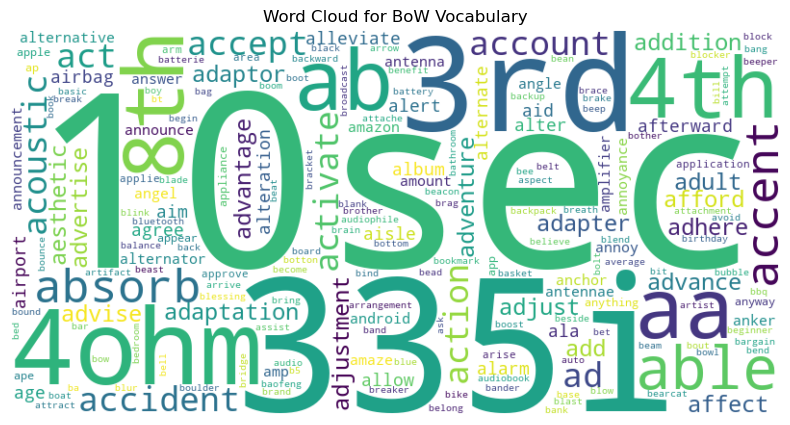

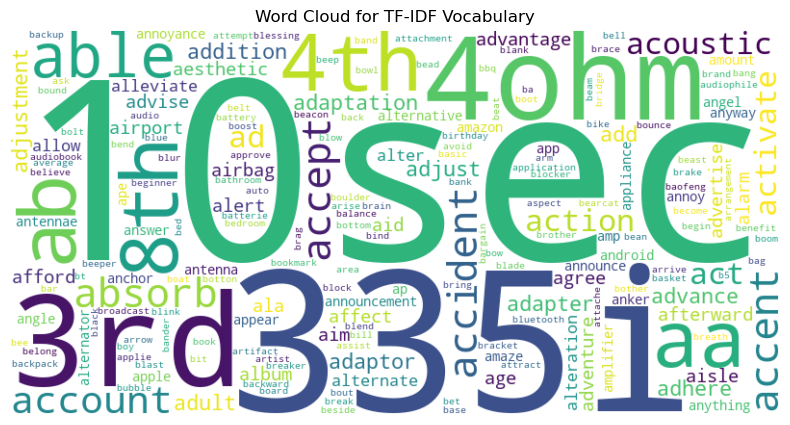

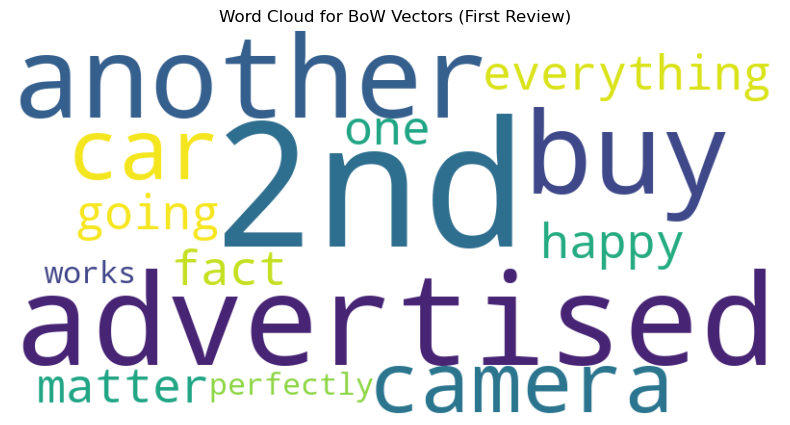

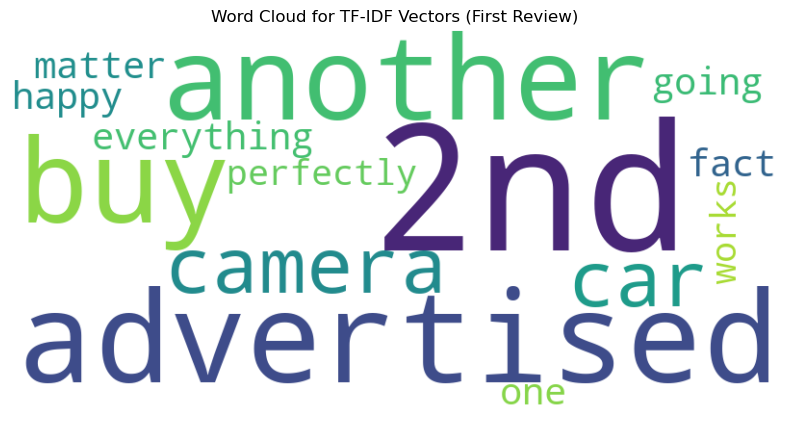

In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Replace 'text_column' with the actual name of the column containing the textual reviews

# Extract the first review
first_review = df['review_body'].iloc[0]

# Bag of Words (BoW) Vectorizer
bow_vectorizer = CountVectorizer()
bow_vectors = bow_vectorizer.fit_transform(df['review_body'])
bow_feature_names = bow_vectorizer.get_feature_names_out()

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(df['review_body'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Word Clouds
def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Word Cloud for BoW vocabulary
plot_word_cloud(' '.join(bow_feature_names), 'Word Cloud for BoW Vocabulary')

# Word Cloud for TF-IDF vocabulary
plot_word_cloud(' '.join(tfidf_feature_names), 'Word Cloud for TF-IDF Vocabulary')

# Word Cloud for BoW vectors of the first review
plot_word_cloud(' '.join([word for word in bow_feature_names if bow_vectors[0, bow_vectorizer.vocabulary_[word]] > 0]), 'Word Cloud for BoW Vectors (First Review)')

# Word Cloud for TF-IDF vectors of the first review
plot_word_cloud(' '.join([word for word in tfidf_feature_names if tfidf_vectors[0, tfidf_vectorizer.vocabulary_[word]] > 0]), 'Word Cloud for TF-IDF Vectors (First Review)')

# B) Modeling & Performance

# III. Implementation of Vectorization and Models

## Implementing Bag of Words Vectorization and Using Naive Bayes model

## Type 1(a): Vectorization: BOW<br> Classifier Model: Naive Bayes

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

data = l

X= df['review_body']
y = df['review_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

classifier = MultinomialNB()

classifier.fit(X_train_vectorized, y_train)

y_pred = classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confustion Matrix\n", cm)

Accuracy: 0.86825

Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.74      0.78      1284
    positive       0.88      0.93      0.91      2716

    accuracy                           0.87      4000
   macro avg       0.86      0.84      0.84      4000
weighted avg       0.87      0.87      0.87      4000

Confustion Matrix
 [[ 955  329]
 [ 198 2518]]


## Implementing Bag of Words Vectorization and Using Random Forest model

## Type 1(b): Vectorization: BOW<br> Classifier Model: Random Forest

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

data = l

X= df['review_body']
y = df['review_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

classifier.fit(X_train_vectorized, y_train)

y_pred = classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confustion Matrix\n", cm)

Accuracy: 0.8705

Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.69      0.77      1284
    positive       0.87      0.96      0.91      2716

    accuracy                           0.87      4000
   macro avg       0.87      0.82      0.84      4000
weighted avg       0.87      0.87      0.87      4000

Confustion Matrix
 [[ 886  398]
 [ 120 2596]]


## Top 20 features derived from trained model (Naive Bayes)

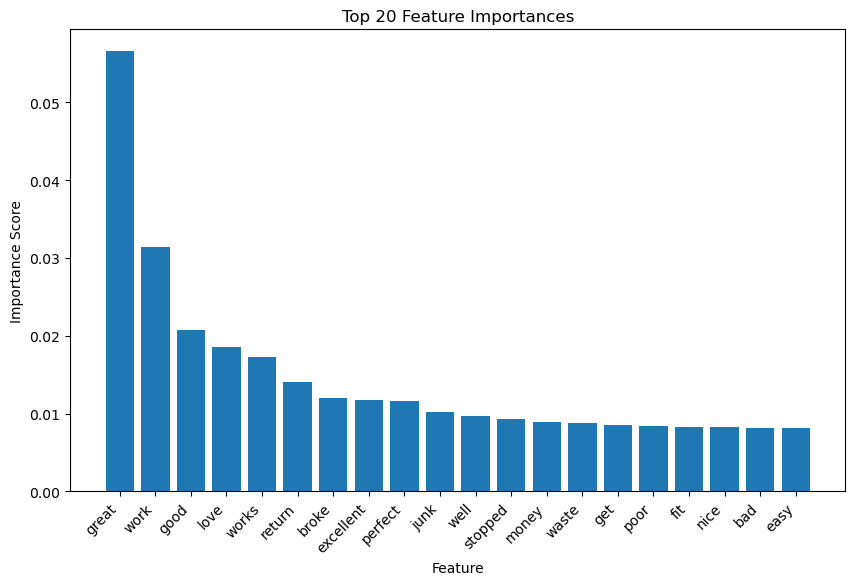

In [48]:
# Get feature importances from the trained model
feature_importances = classifier.feature_importances_
features = vectorizer.get_feature_names_out()

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]
# Plot the top N feature importances
top_n = 20
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), feature_importances[sorted_idx[:top_n]], align='center')
plt.xticks(range(top_n), features[sorted_idx[:top_n]], rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top {} Feature Importances'.format(top_n))
plt.show()

## Implementing Bag of TFid Vectorization and Using Naive Bayes model

## Type2(a): Vectorization: tf-idf<br> Classifier Model: Naive Bayes

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

data = l

X= corpus #df['review_body']
y = df['review_category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(strip_accents = 'ascii', lowercase = True, max_features=700)


X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [28]:
X_train_vectorized.shape

(16000, 700)

### Deriving the vocabulary used for building vectors

In [29]:
vectorizer.get_feature_names_out()

array(['able', 'absolutely', 'actually', 'adapter', 'add', 'adjust',
       'advertised', 'ago', 'air', 'alarm', 'almost', 'along', 'already',
       'also', 'although', 'always', 'amazing', 'amazon', 'amp',
       'android', 'annoying', 'another', 'antenna', 'anyone', 'anything',
       'anywhere', 'apart', 'app', 'apple', 'around', 'arrived',
       'attached', 'audio', 'automatically', 'aux', 'available', 'away',
       'awesome', 'back', 'bad', 'bag', 'band', 'base', 'bass',
       'batteries', 'battery', 'beat', 'behind', 'believe', 'best',
       'better', 'big', 'bit', 'black', 'blue', 'bluetooth', 'bose',
       'bottom', 'bought', 'box', 'br', 'brand', 'break', 'bright',
       'broke', 'broken', 'bt', 'build', 'built', 'button', 'buttons',
       'buy', 'buying', 'cable', 'cables', 'call', 'calls', 'cam', 'came',
       'camera', 'cannot', 'car', 'card', 'carry', 'cars', 'case',
       'cases', 'cd', 'cell', 'change', 'charge', 'charged', 'charger',
       'chargers', 'charge

In [31]:
classifier = MultinomialNB()

classifier.fit(X_train_vectorized, y_train)

y_pred = classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confustion Matrix\n", cm)

Accuracy: 0.835

Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.58      0.69      1284
    positive       0.83      0.95      0.89      2716

    accuracy                           0.83      4000
   macro avg       0.84      0.77      0.79      4000
weighted avg       0.84      0.83      0.83      4000

Confustion Matrix
 [[ 750  534]
 [ 126 2590]]


In [32]:
classifier.feature_count_

array([[27.66189262,  9.77189783, 18.74880692, ..., 20.73754628,
         9.23586117, 12.04784455],
       [43.80077847, 24.62395102, 33.43668823, ..., 41.05806493,
        39.15027286, 39.62166805]])

## Implementing Bag of TFid Vectorization and Using Random Forest model

## Type 2(b): Vectorization: tf-idf<br> Classifier Model: Random Forest

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

data = l

X= corpus #df['review_body']
y = df['review_category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(strip_accents = 'ascii', lowercase = True, max_features=700)

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [34]:
X_train_vectorized.shape

(16000, 700)

In [35]:
vectorizer.get_feature_names_out()

array(['able', 'absolutely', 'actually', 'adapter', 'add', 'adjust',
       'advertised', 'ago', 'air', 'alarm', 'almost', 'along', 'already',
       'also', 'although', 'always', 'amazing', 'amazon', 'amp',
       'android', 'annoying', 'another', 'antenna', 'anyone', 'anything',
       'anywhere', 'apart', 'app', 'apple', 'around', 'arrived',
       'attached', 'audio', 'automatically', 'aux', 'available', 'away',
       'awesome', 'back', 'bad', 'bag', 'band', 'base', 'bass',
       'batteries', 'battery', 'beat', 'behind', 'believe', 'best',
       'better', 'big', 'bit', 'black', 'blue', 'bluetooth', 'bose',
       'bottom', 'bought', 'box', 'br', 'brand', 'break', 'bright',
       'broke', 'broken', 'bt', 'build', 'built', 'button', 'buttons',
       'buy', 'buying', 'cable', 'cables', 'call', 'calls', 'cam', 'came',
       'camera', 'cannot', 'car', 'card', 'carry', 'cars', 'case',
       'cases', 'cd', 'cell', 'change', 'charge', 'charged', 'charger',
       'chargers', 'charge

In [36]:
classifier = RandomForestClassifier()

classifier.fit(X_train_vectorized, y_train)

y_pred = classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confustion Matrix\n", cm)

Accuracy: 0.84225

Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.69      0.74      1284
    positive       0.86      0.91      0.89      2716

    accuracy                           0.84      4000
   macro avg       0.83      0.80      0.81      4000
weighted avg       0.84      0.84      0.84      4000

Confustion Matrix
 [[ 891  393]
 [ 238 2478]]


## Top 20 features derived from trained model (Random Forest)

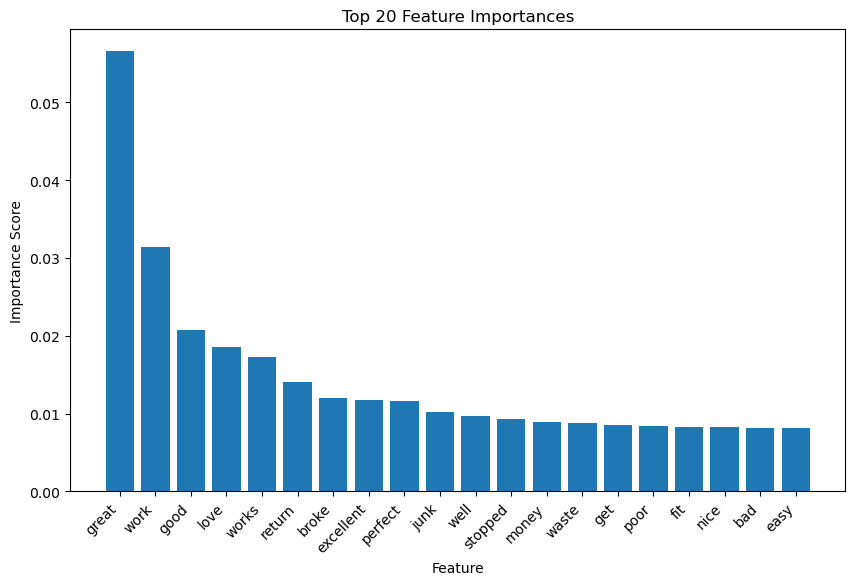

In [47]:
# Get feature importances from the trained model
feature_importances = classifier.feature_importances_

features = vectorizer.get_feature_names_out()

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]
# Plot the top N feature importances
top_n = 20
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), feature_importances[sorted_idx[:top_n]], align='center')
plt.xticks(range(top_n), features[sorted_idx[:top_n]], rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top {} Feature Importances'.format(top_n))
plt.show()


# C) Insights

## Top 10 products by reivew count

C:\Users\svash\AppData\Local\Temp\ipykernel_19828\61979705.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_positive_df['product_title'] = top_positive_df['product_title'].apply(lambda x: x[:30] + "..." if len(x) > 30 else x)


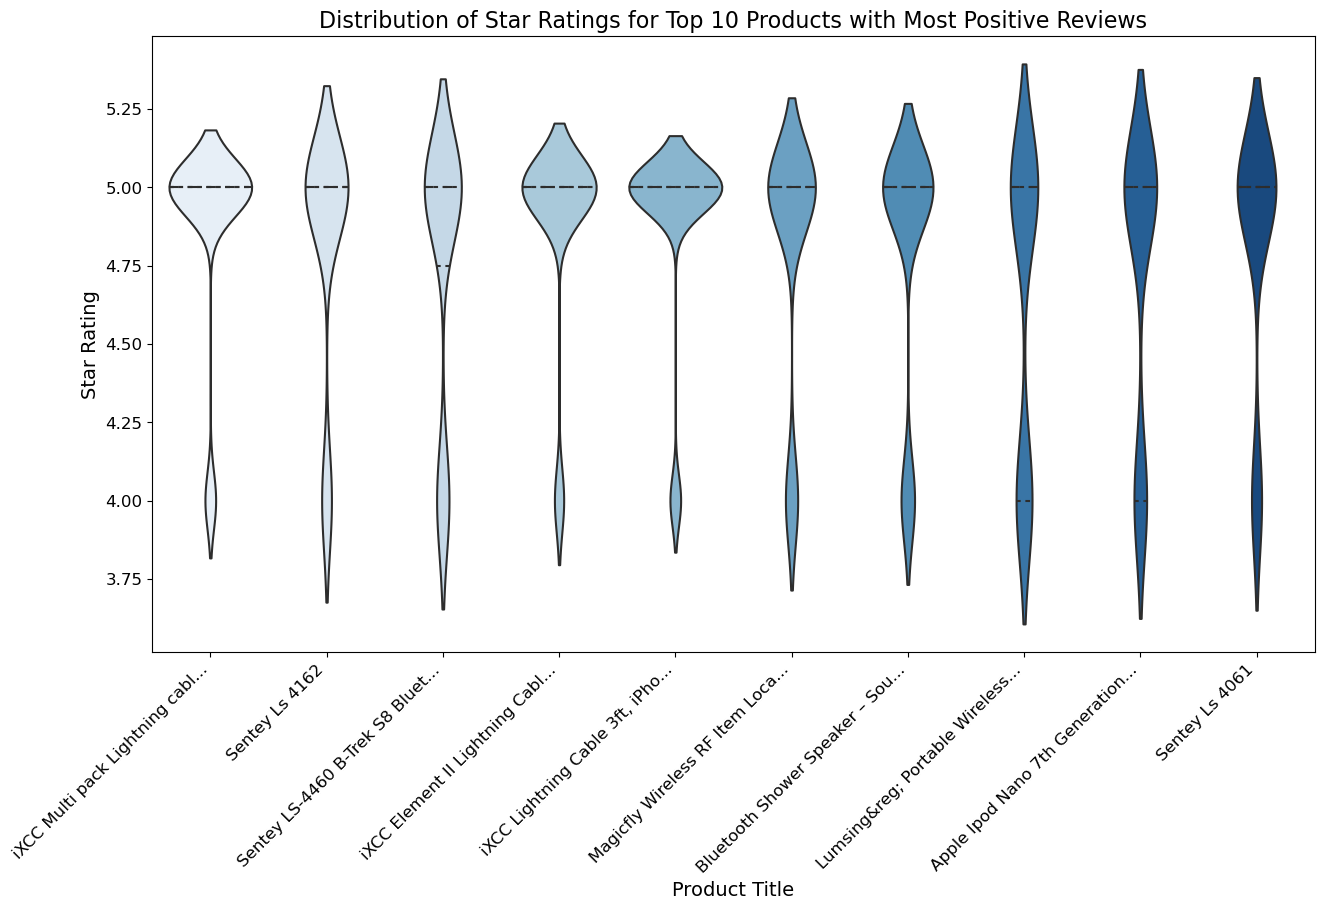

In [81]:
import seaborn as sns

# Assuming you have a DataFrame 'df_2' with 'product_title' and 'review_category' columns

# Filter for positive reviews
positive_reviews = df_2[df_2['review_category'] == 'positive']

# Get the top 10 products with the most positive reviews
top_positive_products = positive_reviews['product_title'].value_counts().head(10).index

# Filter the DataFrame for the top 10 products
top_positive_df = positive_reviews[positive_reviews['product_title'].isin(top_positive_products)]

# Adjust figure size for better visualization
plt.figure(figsize=(15, 8))

# Limit the length of product titles for better visualization
top_positive_df['product_title'] = top_positive_df['product_title'].apply(lambda x: x[:30] + "..." if len(x) > 30 else x)

# Plot a violin plot
sns.violinplot(x='product_title', y='star_rating', data=top_positive_df, palette='Blues', inner='quartile')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Adjust font size and rotation
plt.yticks(fontsize=12)  # Adjust y-axis tick font size
plt.xlabel('Product Title', fontsize=14)  # Adjust x-axis label font size
plt.ylabel('Star Rating', fontsize=14)  # Adjust y-axis label font size
plt.title('Distribution of Star Ratings for Top 10 Products with Most Positive Reviews', fontsize=16)  # Adjust title font size
plt.show()



## Top 10 reviewers

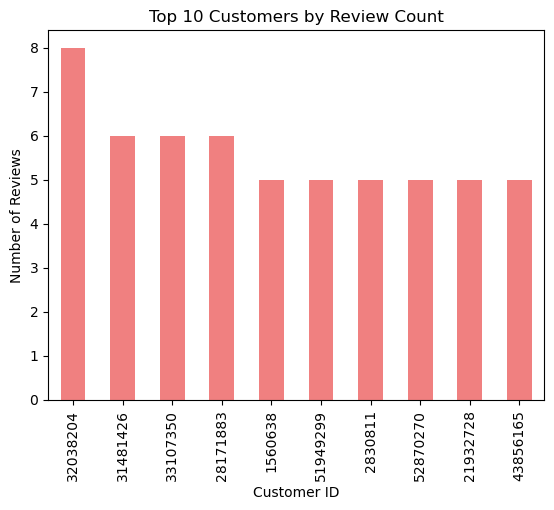

In [44]:
customer_review_count = df_2['customer_id'].value_counts().head(10)  # Displaying top 10 customers by review count
customer_review_count.plot(kind='bar', color='lightcoral')
plt.xlabel('Customer ID')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Customers by Review Count')
plt.show()


## Top 5 products with highest count of positive review

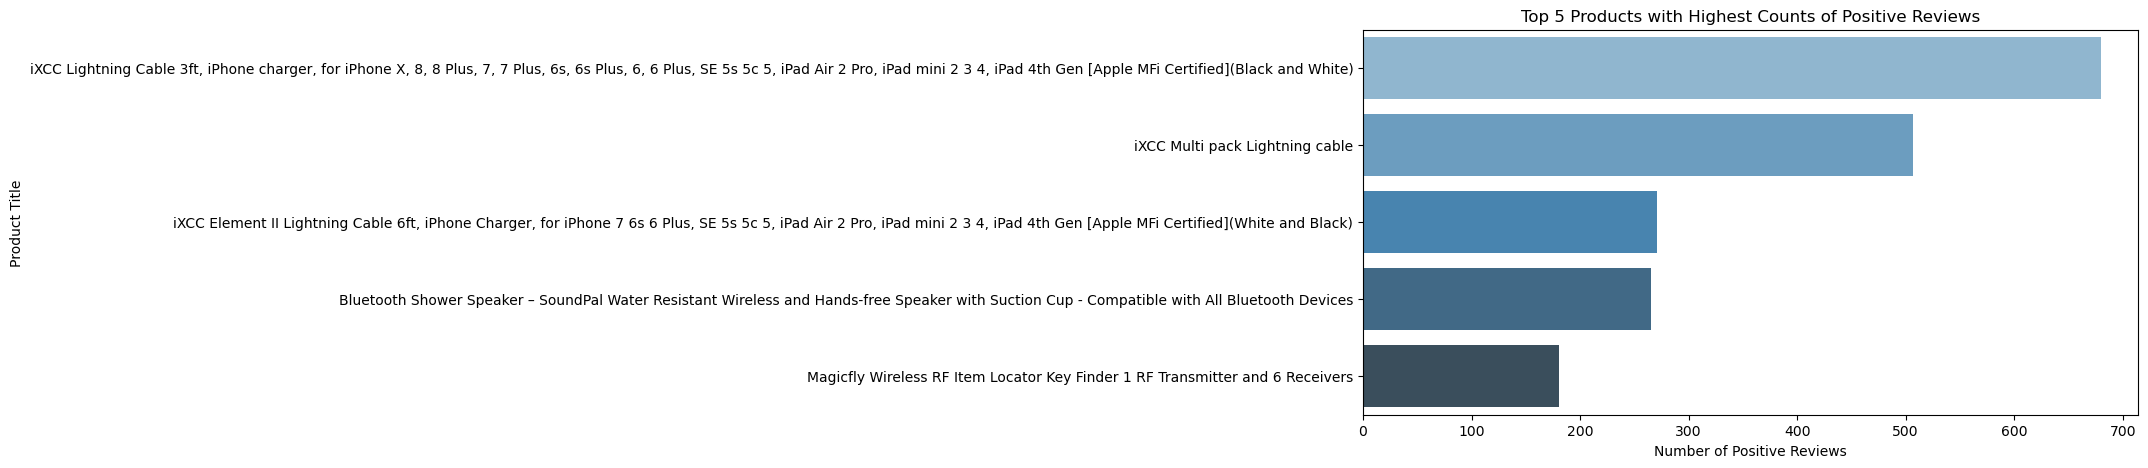

In [45]:
import seaborn as sns

# Assuming you have a 'sentiment_label' column in your DataFrame
positive_reviews = df_2[df_2['review_category'] == 'positive']

# Get the top 5 products with the highest counts of positive reviews
top_positive_products = positive_reviews['product_title'].value_counts().head(5)

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=top_positive_products.values, y=top_positive_products.index, palette='Blues_d')
plt.xlabel('Number of Positive Reviews')
plt.ylabel('Product Title')
plt.title('Top 5 Products with Highest Counts of Positive Reviews')
plt.show()


## Top 5 Best Prodcuts by IDs

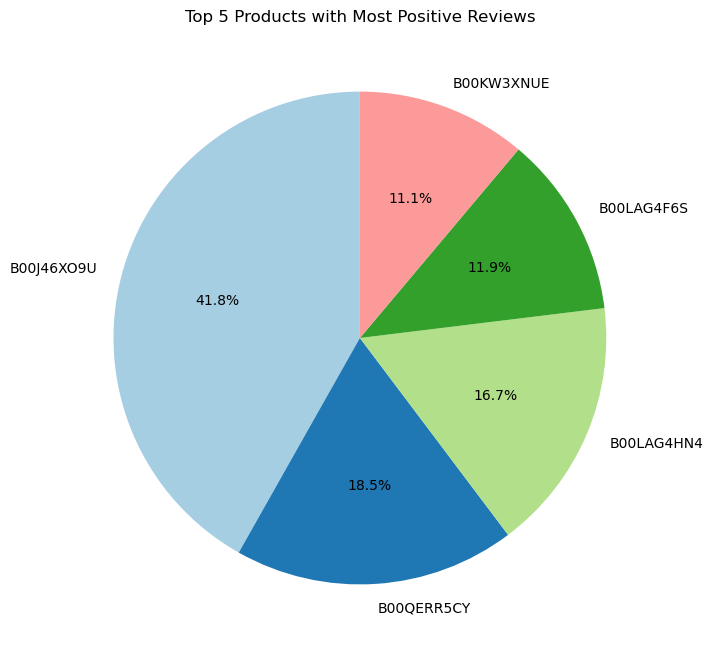

In [62]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with 'product_id' and 'sentiment_label' columns

# Filter for positive reviews
positive_reviews = df_2[df_2['review_category'] == 'positive']

# Get the top 5 product IDs with the most positive reviews
top_positive_products = positive_reviews['product_id'].value_counts().head(5)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_positive_products, labels=top_positive_products.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 5 Products with Most Positive Reviews')
plt.show()


## Top 5 products with most positive reviews

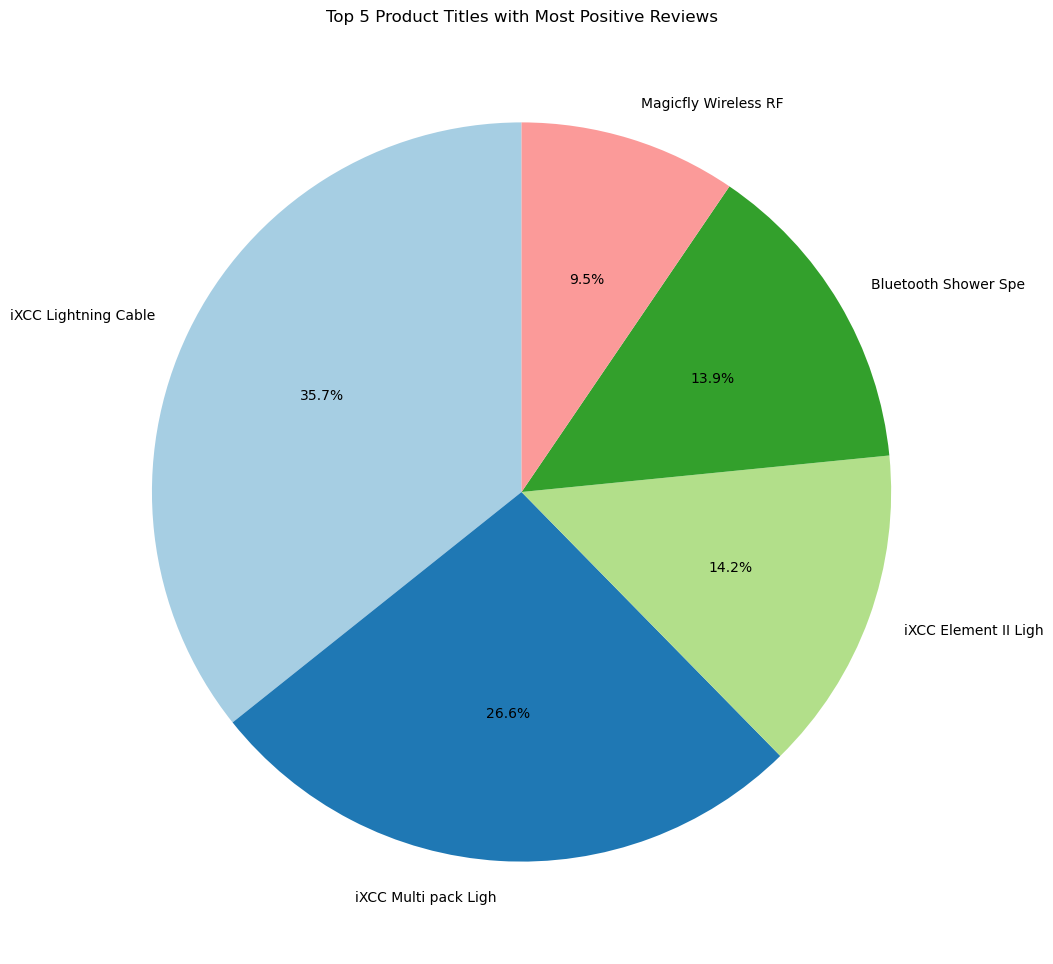

In [79]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with 'product_id', 'product_title', and 'sentiment_label' columns

# Filter for positive reviews
positive_reviews = df_2[df_2['review_category'] == 'positive']

# Get the top 5 product titles with the most positive reviews
top_positive_products = positive_reviews['product_title'].value_counts().head(5)

# Limit the length of product titles for better visualization
top_positive_products.index = top_positive_products.index.str[:20]  # You can adjust the length as needed

# Adjust figure size for better visualization
plt.figure(figsize=(12, 12))

# Plot the pie chart with product titles as labels
plt.pie(top_positive_products, labels=top_positive_products.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 5 Product Titles with Most Positive Reviews')
plt.show()



# Summary on models and performances

## The BoW & Naive-Bayes 

In [ ]:
## Accuracy- 0.8682
## Precison- 0.87
## Recall- 0.87
## F1-Score- 0.87

## The BoW & Random Forest 

In [ ]:
## Accuracy- 0.8705
## Precison- 0.87
## Recall- 0.87
## F1-Score- 0.87

## The Tf-idf & Naive Bayes

In [ ]:
## Accuracy- 0.835
## Precison- 0.84
## Recall- 0.83
## F1-Score- 0.83

## The Tf-idf & Random Forest

In [ ]:
## Accuracy- 0.8445
## Precison- 0.84
## Recall- 0.83
## F1-Score- 0.83

# D) Conclusion:

## The best performance is achieved by BoW vectorization method with a variation of 0.03 from Tf-idf. But we saw how differently importance to words are given in the form of word clouds, Tf-idf does better job in terms of normalizing repeated words and finding out actual significant words that matter. 

## In case of this dataset BoW might have performed better but on a high variance data set we can conclude Tf-idf is the best approach. 